# Домашнее задание "Теория оптимизации".

## Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [2]:
# функция Экли
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e # формула Экли

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=50, tol=0.1, mutation=0.1, recombination=0.7, seed=42, updating='deferred')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4463
     nit: 43
 success: True
       x: array([0., 0.])

Нам необходимо достичь наименьшего ко-ва итераций


In [3]:
nits = []
mutation = np.linspace(0, 2, num=10, endpoint=False)
for m in mutation:
    result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=50, tol=0.1, mutation=m, recombination=0.7, seed=42, updating='deferred')
    nits.append(result.nit)


In [4]:
nits 

[7, 57, 92, 146, 205, 265, 337, 427, 495, 588]

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Число итераций')

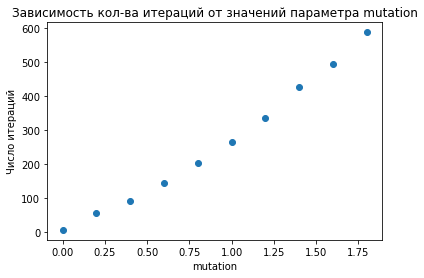

In [6]:
plt.scatter(mutation, nits)
plt.title('Зависимость кол-ва итераций от значений параметра mutation')
plt.xlabel('mutation')
plt.ylabel('Число итераций')

In [7]:
nits_strategy = []
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
for s in strategy:
    result = differential_evolution(ackley, bounds, strategy=s, popsize=50, tol=0.1, mutation=1, recombination=0.7, seed=42, updating='deferred')
    nits_strategy.append(result.nit)


Text(0, 0.5, 'Число итераций')

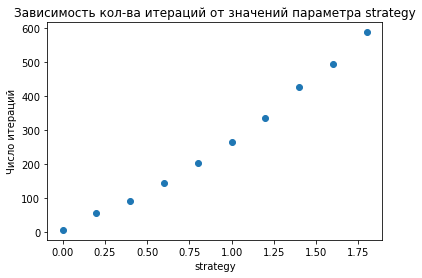

In [8]:
plt.scatter(mutation, nits)
plt.title('Зависимость кол-ва итераций от значений параметра strategy')
plt.xlabel('strategy')
plt.ylabel('Число итераций')

In [9]:
nits_tol = []
tol = np.linspace(0, 1, num=10)
for t in tol:
    result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=50, tol=t, mutation=1, recombination=0.7, seed=42, updating='deferred')
    nits_tol.append(result.nit)


Text(0, 0.5, 'Число итераций')

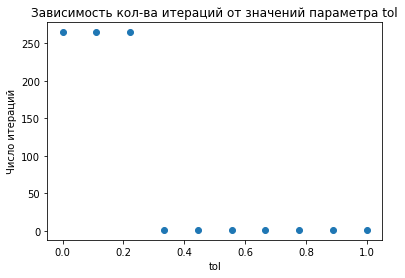

In [10]:
plt.scatter(tol, nits_tol)
plt.title('Зависимость кол-ва итераций от значений параметра tol')
plt.xlabel('tol')
plt.ylabel('Число итераций')

In [11]:
nits_popsize = []
popsize = list(range(1,100))
for p in popsize:
    result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=p, tol=0.1, mutation=1, recombination=0.7, seed=42, updating='deferred')
    nits_popsize.append(result.nit)


Text(0, 0.5, 'Число итераций')

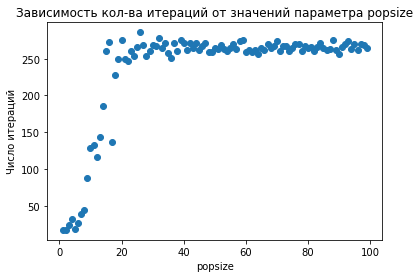

In [12]:
plt.scatter(popsize, nits_popsize)
plt.title('Зависимость кол-ва итераций от значений параметра popsize')
plt.xlabel('popsize')
plt.ylabel('Число итераций')

In [14]:
nits_recombination = []
recombination = np.linspace(0, 1, num=10, endpoint=False)
for r in recombination:
    result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=10, tol=0.1, mutation=1, recombination=r, seed=42, updating='deferred')
    nits_recombination.append(result.nit)


Text(0, 0.5, 'Число итераций')

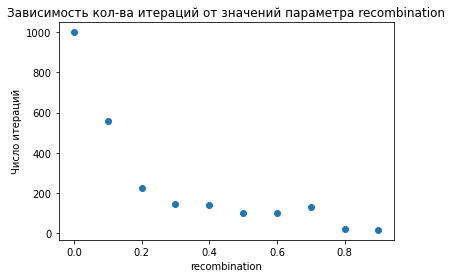

In [15]:
plt.scatter(recombination, nits_recombination)
plt.title('Зависимость кол-ва итераций от значений параметра recombination')
plt.xlabel('recombination')
plt.ylabel('Число итераций')